In [1]:
#importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading the csv file
df=pd.read_csv('Online Retail.csv')

In [3]:
df.shape

(541909, 8)

In [4]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom


In [5]:
#droping the duplicates
df.drop_duplicates(inplace=True)

In [6]:
df.shape

(536641, 8)

In [7]:
#checking the null values
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [8]:
df.isnull().mean()

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002709
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.000000
Country        0.000000
dtype: float64

In [9]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int64
Country         object
dtype: object

In [11]:
#checking for count of products
df.Description.value_counts().sort_values(ascending=False)

WHITE HANGING HEART T-LIGHT HOLDER    2357
REGENCY CAKESTAND 3 TIER              2189
JUMBO BAG RED RETROSPOT               2156
PARTY BUNTING                         1720
LUNCH BAG RED RETROSPOT               1625
                                      ... 
RED ROSE AND LACE C/COVER                1
BLACK CHRISTMAS FLOCK DROPLET            1
FUNKY MONKEY MUG                         1
GIRLY PINK TOOL SET                      1
found some more on shelf                 1
Name: Description, Length: 4223, dtype: int64

In [37]:
countries=df.Country.value_counts()[0:10].reset_index()
countries.columns=['CountryName','TotalCustomer'] 
countries

,CountryName,TotalCustomer
0,United Kingdom,490300
1,Germany,9480
2,France,8541
3,EIRE,8184
4,Spain,2528
5,Netherlands,2371
6,Belgium,2069
7,Switzerland,1994
8,Portugal,1510
9,Australia,1258


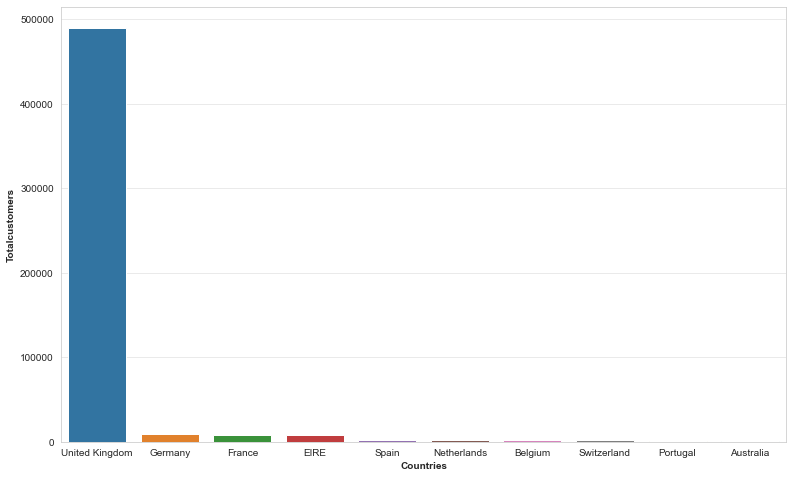

In [42]:
sns.set_style("whitegrid")
plt.subplots(figsize=(13,8))

sns.barplot(x= 'CountryName',y ='TotalCustomer',data=countries) # oTH TO 10TH
plt.xlabel("Countries",weight="bold")
plt.ylabel("Totalcustomers",weight="bold")
plt.grid(alpha = 0.5,axis = "y")

from the above graph we can conculde that
1)uk has highest number transcation
2)followed by germany and germany and france

In [43]:
#converting string to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [14]:
#as description as 2709 null values we can fill it with mode
df['Description'].fillna(df.Description.mode()[0],inplace=True)

In [44]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [17]:
df.groupby(['Country'])['Quantity'].value_counts().sort_values(ascending=False)

Country         Quantity
United Kingdom  1           142475
                2            77900
                12           50233
                3            35135
                6            34989
                             ...  
Netherlands     7                1
                17               1
                92               1
                140              1
Unspecified     40               1
Name: Quantity, Length: 1855, dtype: int64

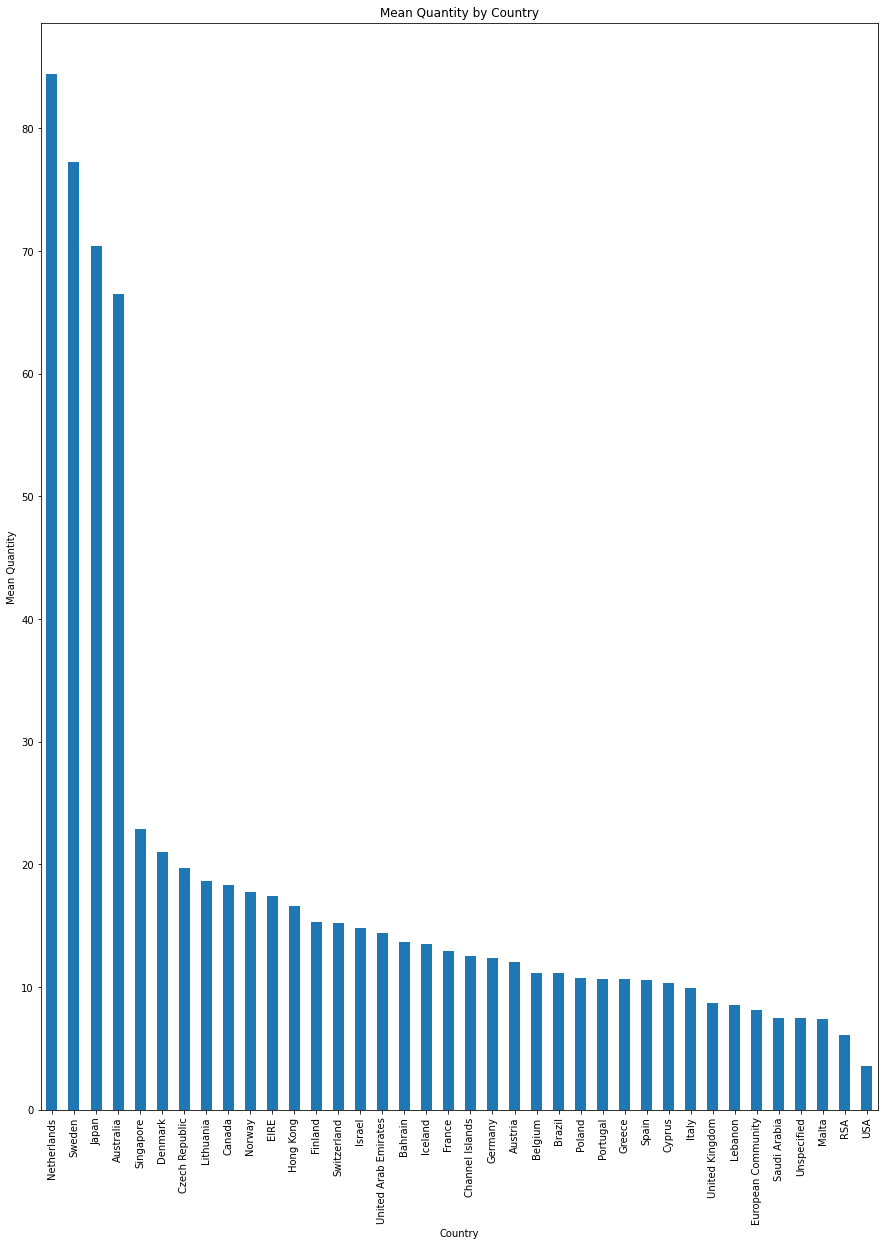

In [16]:
mean_quantity_by_country = df.groupby('Country')['Quantity'].mean().sort_values(ascending =False)
plt.figure(figsize=(15, 20))
mean_quantity_by_country.plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Mean Quantity by Country')
plt.xlabel('Country')
plt.ylabel('Mean Quantity')
plt.show()

from the above graph we conclude that 1)Netherlands has purchased highest quantity of products  2)followed by sweden and japan

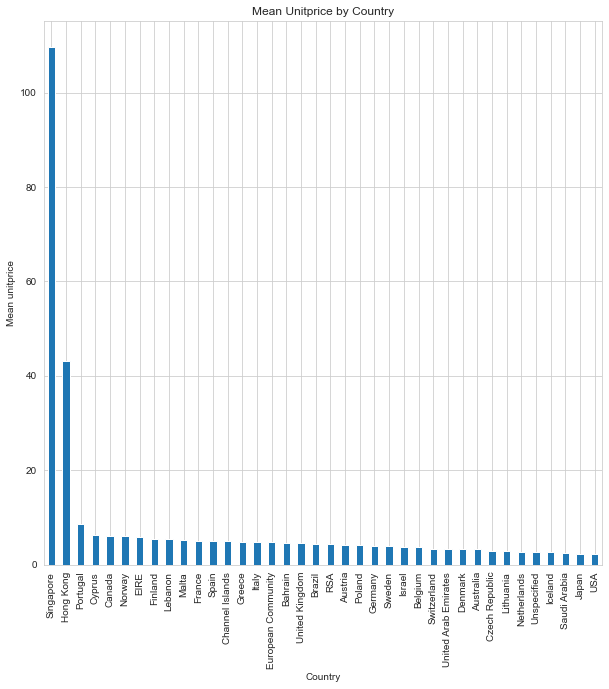

In [84]:
mean_quantity_by_country = df.groupby('Country')['UnitPrice'].mean().sort_values(ascending =False)
plt.figure(figsize=(10, 10))
mean_quantity_by_country.plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Mean Unitprice by Country')
plt.xlabel('Country')
plt.ylabel('Mean unitprice')
plt.show()

from the above graph we conclude that
1)Singapore has highest mean unit price
2)followed by Hongkong and portugal

In [61]:
year = pd.DatetimeIndex(df['InvoiceDate']).year
month = pd.DatetimeIndex(df['InvoiceDate']).month

In [62]:
year.unique()
month.unique()

Int64Index([12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64', name='InvoiceDate')

In [45]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [46]:
#calculating the total price 
df['Total_Price']=df['Quantity']*df['UnitPrice']

In [55]:
country_with_more_purchase=df.groupby('Country')['Total_Price'].sum()[0:10].reset_index()
country_with_more_purchase.columns=['Country_name','Amount_spent']
country_with_more_purchase

,Country_name,Amount_spent
0,Australia,137009.77
1,Austria,10154.32
2,Bahrain,548.40
3,Belgium,40910.96
4,Brazil,1143.60
5,Canada,3666.38
6,Channel Islands,20076.39
7,Cyprus,12858.76
8,Czech Republic,707.72
9,Denmark,18768.14


<AxesSubplot:xlabel='Country_name', ylabel='Amount_spent'>

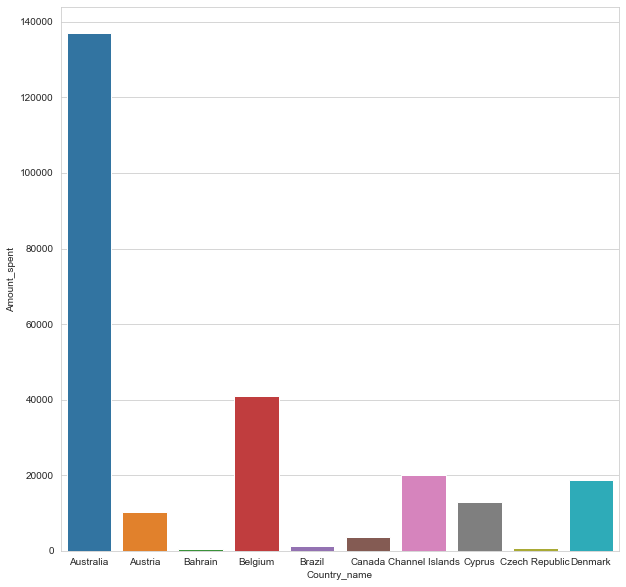

In [59]:
plt.figure(figsize=(10,10))
sns.barplot(x='Country_name',y='Amount_spent',data=country_with_more_purchase)

from the above graph we can say that
1)Australia has spent more mount on buying the products
2)followed by belgium

In [63]:
year

Int64Index([2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010,
            ...
            2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011],
           dtype='int64', name='InvoiceDate', length=536641)

In [64]:
month

Int64Index([12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='InvoiceDate', length=536641)

In [70]:
import calendar

In [72]:
def month_name(n):
    return calendar.month_name[n]   

In [74]:
df['Month_Name'] = [month_name(i) for i in month]

In [76]:
df.Month_Name.value_counts()

November     83343
December     67227
October      59969
September    49861
July         39267
May          36782
June         36609
March        36439
August       35064
January      34900
April        29701
February     27479
Name: Month_Name, dtype: int64

Text(0.5, 1.0, 'months vs buys')

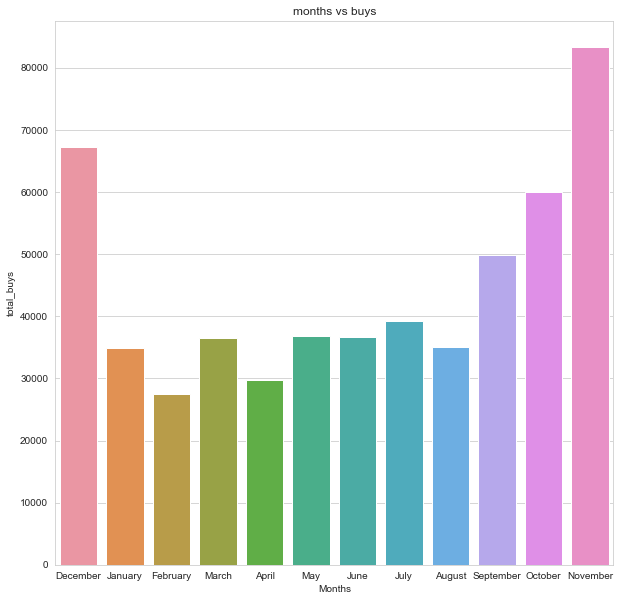

In [82]:
plt.figure(figsize=(10,10))
sns.countplot(x='Month_Name',data=df)
plt.xlabel('Months')
plt.ylabel('total_buys')
plt.title('months vs buys')


from the above graph we conclude that 1) November month had highest sales 2)followed by December and October